In [1]:
import pybma

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import numpy as np

In [2]:
def simulation_table(data_dict, title="Initial Value"):
    """
    Create a table view of simulation data.
    - Yellow: value changes from previous timestep
    - Gray: state that repeats a previous state (marks all repetitions except first occurrence)
    - White: value same as previous timestep
    
    Parameters:
    data_dict: Dictionary with keys as labels and values as lists of y-values
               Example: {'a': [1,2,3,3,2,1,1,2,3,3], 'b': [0,1,2,3,3,2,1,1,2,3], ...}
    title: Title for the first column
    """
    # Set font properties
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
    plt.rcParams['font.size'] = 11
    
    # Get number of rows and columns
    num_rows = len(data_dict)
    labels = list(data_dict.keys())
    max_cols = max(len(data_dict[label]) for label in labels)
    
    # Build state for each column
    states = []
    for col_idx in range(max_cols):
        current_state = tuple(data_dict[label][col_idx] for label in labels)
        states.append(current_state)
    
    # Find which state repeats (if any) and mark all its repetitions except first occurrence
    repeated_cols = set()
    state_first_occurrence = {}
    repeating_state = None
    
    for col_idx, state in enumerate(states):
        if state in state_first_occurrence:
            # This state has been seen before, mark this as repeated
            if repeating_state == None or repeating_state == state:
                repeated_cols.add(col_idx)
                repeating_state = state
        else:
            # First time seeing this state
            state_first_occurrence[state] = col_idx
    
    # Create figure - each cell is roughly square
    cell_height = 0.6
    cell_width = 0.6
    header_width = 2.5
    
    fig_width = 2*header_width + max_cols * cell_width + 0.5
    fig_height = (num_rows + 1) * cell_height + 0.5
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    ax.set_xlim(0, 2*header_width + max_cols * cell_width)
    ax.set_ylim(0, (num_rows + 1) * cell_height)
    ax.axis('off')
    
    # Draw init header cell
    header_rect = mpatches.Rectangle(
        (0, num_rows * cell_height), header_width, cell_height,
        edgecolor='white', facecolor='#5a5a5a', linewidth=2
    )
    ax.add_patch(header_rect)
    ax.text(3*header_width/2, (num_rows + 0.5) * cell_height, title,
            ha='center', va='center', color='white', fontsize=12, weight='bold')
    
    # Draw name header cell
    header_rect = mpatches.Rectangle(
        (header_width, num_rows * cell_height), header_width, cell_height,
        edgecolor='white', facecolor='#5a5a5a', linewidth=2
    )
    ax.add_patch(header_rect)
    ax.text(header_width/2, (num_rows + 0.5) * cell_height, "Name",
            ha='center', va='center', color='white', fontsize=12, weight='bold')
    
    # Draw each row
    for row_idx, (label, values) in enumerate(data_dict.items()):
        y_pos = (num_rows - row_idx - 1) * cell_height
        
        # Draw name value cell (white background)
        init_rect = mpatches.Rectangle(
            (0, y_pos), header_width, cell_height,
            edgecolor='#cccccc', facecolor='white', linewidth=1
        )
        ax.add_patch(init_rect)
        
        # Add name value 
        ax.text(header_width/2, y_pos + cell_height/2, str(label),
                ha='center', va='center', color='black', fontsize=11)
        
        # Draw initial value cell (white background) - shows first actual value
        init_rect = mpatches.Rectangle(
            (header_width, y_pos), header_width, cell_height,
            edgecolor='#cccccc', facecolor='white', linewidth=1
        )
        ax.add_patch(init_rect)
        
        # Add initial value (first value from the data)
        ax.text(3*header_width/2, y_pos + cell_height/2, str(values[0]),
                ha='center', va='center', color='black', fontsize=11)
        
        # Draw remaining value cells
        for col_idx in range(len(values)):
            value = values[col_idx]
            #x_pos = header_width + col_idx * cell_width
            
            # For the first column, we already drew it in the header section
            if col_idx == 0:
                continue
            
            # Get previous value
            prev_value = values[col_idx - 1]
            
            # Determine color
            if col_idx in repeated_cols:
                # Gray for repeated state
                color = '#d4d4d4'
            elif value != prev_value:
                # Yellow if value changed
                color = '#f5f5c8'
            else:
                # White if value same as previous
                color = '#ffffff'
            
            # Draw cell (offset by -1 since we skip the first column)
            cell_rect = mpatches.Rectangle(
                (2*header_width + (col_idx - 1) * cell_width, y_pos), cell_width, cell_height,
                edgecolor='#cccccc', facecolor=color, linewidth=1
            )
            ax.add_patch(cell_rect)
            
            # Add value text
            ax.text(2*header_width + (col_idx - 1) * cell_width + cell_width/2, 
                   y_pos + cell_height/2, str(value),
                   ha='center', va='center', color='black', fontsize=11)
    
    plt.tight_layout()


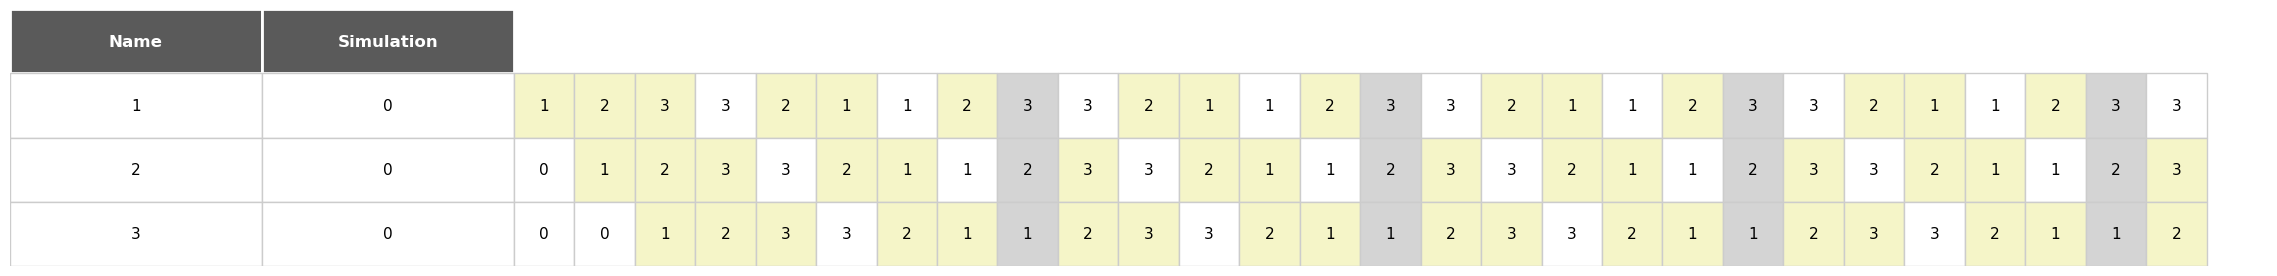

In [3]:
wild_type = pybma.BMAModel("../models/ToyModelUnstable.json")
simulation = pybma.simulate(wild_type.qn,steps=30)
simulation_table(simulation,"Simulation")
plt.show()

In [5]:
"""
For the first 9 steps, make a mutant form and run another simulation storing the result
"""

from copy import deepcopy

variables = list(simulation.keys())

for step in range(9):
    state = {}
    for var in variables:
        state[var] = simulation[var][step]
    for var in variables:
        mutant = deepcopy(wild_type)
        mutant.knockout_variable(var)
        mutant_simulation = pybma.simulate(mutant.qn,steps=30,initial_values=state)
        simulation_table(mutant_simulation,"Mutant variable:"+str(var)+"@" +str(step))
plt.show()
        

KeyNotFoundException: The given key was not present in the dictionary.
   at Microsoft.FSharp.Collections.MapTreeModule.throwKeyNotFound[a]() in /build/dotnet8-z6Gph8/dotnet8-8.0.105-8.0.5/src/fsharp/artifacts/source-build/self/src/src/FSharp.Core/map.fs:line 187
   at Microsoft.FSharp.Collections.MapTreeModule.find[TKey,TValue](IComparer`1 comparer, TKey k, MapTree`2 m) in /build/dotnet8-z6Gph8/dotnet8-8.0.105-8.0.5/src/fsharp/artifacts/source-build/self/src/src/FSharp.Core/map.fs:line 196
   at Simulate.tick@12.Invoke(FSharpMap`2 env, node v)
   at Microsoft.FSharp.Collections.ListModule.Fold[T,TState](FSharpFunc`2 folder, TState state, FSharpList`1 list) in /build/dotnet8-z6Gph8/dotnet8-8.0.105-8.0.5/src/fsharp/artifacts/source-build/self/src/src/FSharp.Core/list.fs:line 288
   at Python.Runtime.Iterator.tp_iternext(BorrowedReference ob) in /home/benedikt/.cache/uv/sdists-v6/.tmpkW03e6/pythonnet-3.0.5/src/runtime/Types/Iterator.cs:line 30